In [1]:
from data_validation import *

# First Step
- read data
- plot data

In [2]:
# read predifined data from sample-file (the real data comes from databases)
df_data = pd.read_parquet('data.gzip')
df_data.info()

df_vgl = df_data[['v_db', 'v_blf']]
df_vgl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45796 entries, 2019-11-06 11:24:00.101000 to 2019-11-06 11:50:17.036436
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v_db           7800 non-null   float64
 1   v_blf          37996 non-null  float64
 2   timestamp      45796 non-null  float64
 3   measured_time  45796 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45796 entries, 2019-11-06 11:24:00.101000 to 2019-11-06 11:50:17.036436
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_db    7800 non-null   float64
 1   v_blf   37996 non-null  float64
dtypes: float64(2)
memory usage: 1.0 MB


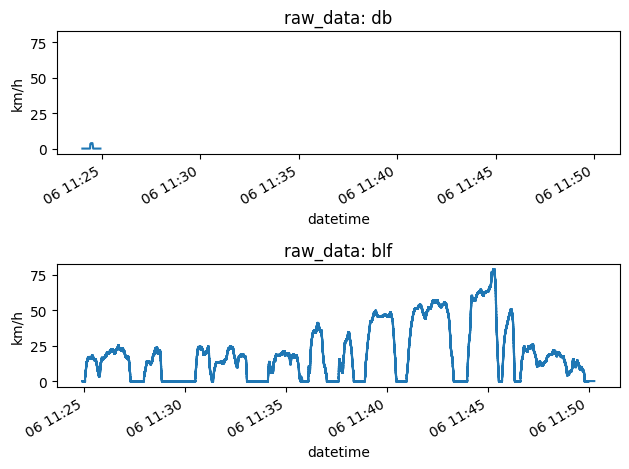

In [3]:
plt.subplot(2, 1, 1)
plt.title('raw_data: db')
plt.xlabel('datetime')
plt.ylabel('km/h')
df_vgl.v_db.plot()
plt.subplot(2, 1, 2)
df_vgl.v_blf.plot()
plt.title('raw_data: blf')
plt.xlabel('datetime')
plt.ylabel('km/h')

plt.tight_layout()
plt.show()

to show all data you have to drop nans (added automatically by creating one dataframe from single data sources)

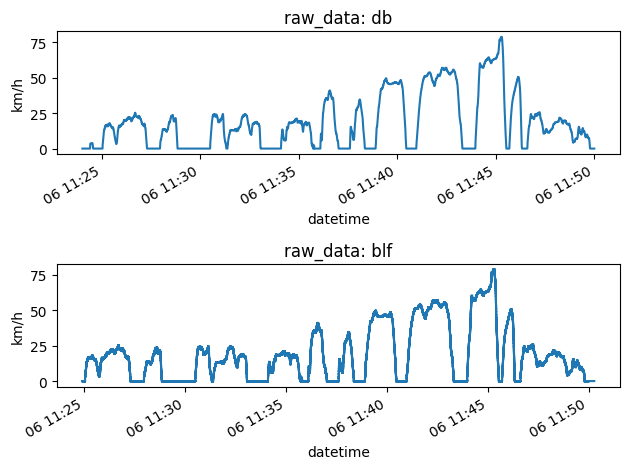

In [4]:
plt.subplot(2, 1, 1)
plt.title('raw_data: db')
plt.xlabel('datetime')
plt.ylabel('km/h')
df_vgl.v_db.dropna().plot()
plt.subplot(2, 1, 2)
df_vgl.v_blf.plot()
plt.title('raw_data: blf')
plt.xlabel('datetime')
plt.ylabel('km/h')

plt.tight_layout()
plt.show()

if you want to compare the 2 sources, you have to interpolate them:

# Second Step: interpolate data
compare diffrent methods:

- ‘linear’
- ‘time’
- ‘spline’

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45796 entries, 2019-11-06 11:24:00.101000 to 2019-11-06 11:50:17.036436
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_db    45796 non-null  float64
 1   v_blf   45520 non-null  float64
dtypes: float64(2)
memory usage: 1.0 MB


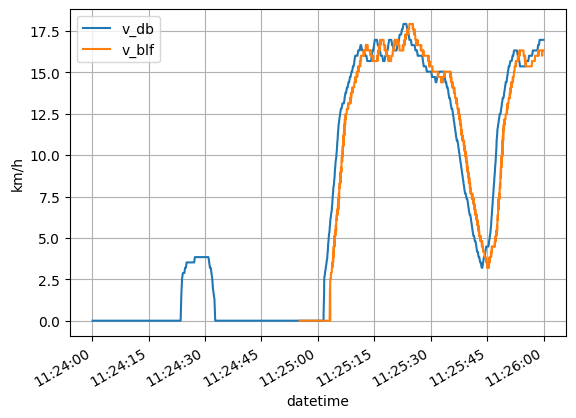

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45520 entries, 2019-11-06 11:24:55.142766 to 2019-11-06 11:50:17.036436
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_db    45520 non-null  float64
 1   v_blf   45520 non-null  float64
dtypes: float64(2)
memory usage: 1.0 MB


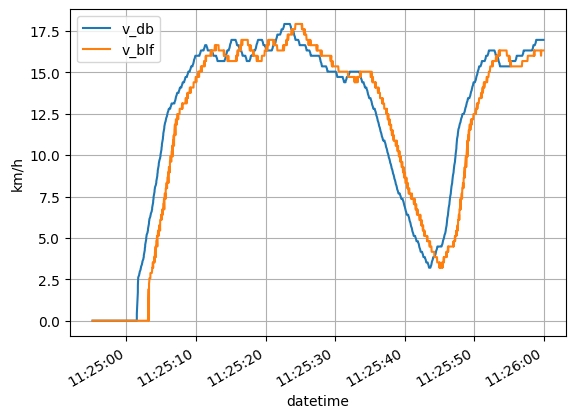

In [5]:
# interpolate data with pandas
interp = df_vgl.interpolate(method='linear')

# plot data
interp.info()
interp.between_time('11:24:00', '11:26:00').plot()
plt.xlabel('datetime')
plt.ylabel('km/h')
plt.grid()
plt.show()
interp.dropna(inplace=True)
interp.info()
interp.between_time('11:24:00', '11:26:00').plot()
plt.xlabel('datetime')
plt.ylabel('km/h')
plt.grid()
plt.show()

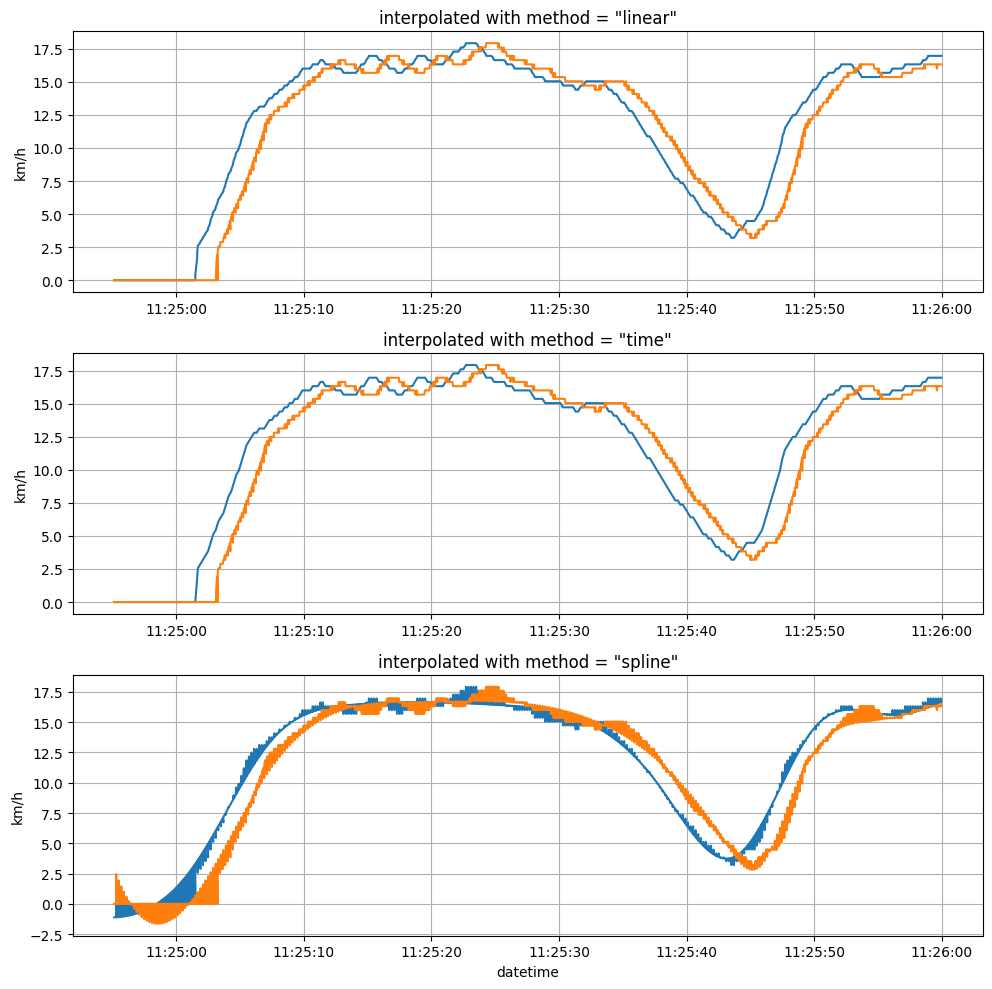

In [6]:

# interpolate data with pandas and other methods
interp_time = df_vgl.interpolate(method='time').dropna()
interp_spline = df_vgl.interpolate(method='spline', order=3).dropna()
plt.subplots(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.plot(interp.between_time('11:24:00', '11:26:00'))
#interp.between_time('11:24:00', '11:26:00').plot()
plt.ylabel('km/h')
plt.title('interpolated with method = "linear"')
#plt.legend(loc='best')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(interp_time.between_time('11:24:00', '11:26:00'))
#interp_time.between_time('11:24:00', '11:26:00').plot()
plt.ylabel('km/h')
plt.title('interpolated with method = "time"')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(interp_spline.between_time('11:24:00', '11:26:00'))
#interp_spline.between_time('11:24:00', '11:26:00').plot()
plt.xlabel('datetime')
plt.ylabel('km/h')
plt.title('interpolated with method = "spline"')
plt.grid()

plt.tight_layout()
plt.show()

In [7]:
# vergleich der unterschiede zw. time und linear
x = interp.compare(interp_time)
x

v_db           v_blf          
                                self     other  self     other
2019-11-06 11:25:01.503904  0.426667  0.011570   NaN       NaN
2019-11-06 11:25:01.553898  0.853333  0.651493   NaN       NaN
2019-11-06 11:25:01.604094  1.280000  1.294002   NaN       NaN
2019-11-06 11:25:01.649106  1.706667  1.870155   NaN       NaN
2019-11-06 11:25:01.654032  2.133333  1.933207   NaN       NaN
...                              ...       ...   ...       ...
2019-11-06 11:49:46.763000       NaN       NaN  5.28  5.250910
2019-11-06 11:49:46.963000       NaN       NaN  4.64  4.612895
2019-11-06 11:49:47.163000       NaN       NaN  4.00  3.975705
2019-11-06 11:49:47.563000       NaN       NaN  2.72  2.700328
2019-11-06 11:49:47.963000       NaN       NaN  0.96  0.929536

[14217 rows x 4 columns]

<AxesSubplot:>

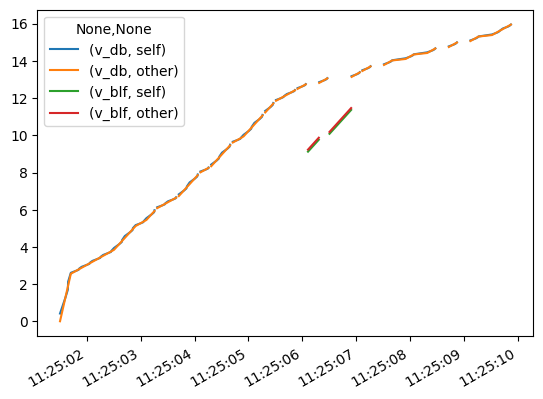

In [8]:
x.between_time('11:25:00', '11:25:10').plot()